## Work
1. 請建立自己的deep neural network
2. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
3. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [16]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [17]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [18]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [19]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    # 模型建立完成後，統計參數總量
    print("Total Parameters：%d\n" % model.count_params())
    
    # 輸出模型摘要資訊
    model.summary()
    
    return model

In [20]:
model_1 = build_mlp()

Total Parameters：1738890

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_2 = build_mlp()

Total Parameters：1738890

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [22]:
"""
Compile 模型
"""
opt1 = keras.optimizers.Adam(lr=0.001)
opt2 = keras.optimizers.SGD(lr=0.001)
model_1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt1)
model_2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt2)

In [24]:
"""
設定要訓練的 Epoch 數
"""
history_1 = model_1.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 13s 266us/step - loss: 2.0646 - accuracy: 0.2699 - val_loss: 2.0459 - val_accuracy: 0.2773
Epoch 2/500
50000/50000 [==============================] - 13s 267us/step - loss: 2.0292 - accuracy: 0.2871 - val_loss: 2.0142 - val_accuracy: 0.2902
Epoch 3/500
50000/50000 [==============================] - 14s 272us/step - loss: 2.0002 - accuracy: 0.2984 - val_loss: 1.9881 - val_accuracy: 0.2998
Epoch 4/500
50000/50000 [==============================] - 14s 273us/step - loss: 1.9757 - accuracy: 0.3095 - val_loss: 1.9654 - val_accuracy: 0.3108
Epoch 5/500
50000/50000 [==============================] - 13s 252us/step - loss: 1.9543 - accuracy: 0.3167 - val_loss: 1.9457 - val_accuracy: 0.3191
Epoch 6/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.9359 - accuracy: 0.3241 - val_loss: 1.9297 - val_accuracy: 0.3254
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.6562 - accuracy: 0.4254 - val_loss: 1.6617 - val_accuracy: 0.4239
Epoch 56/500
50000/50000 [==============================] - 13s 252us/step - loss: 1.6530 - accuracy: 0.4263 - val_loss: 1.6601 - val_accuracy: 0.4237
Epoch 57/500
50000/50000 [==============================] - 14s 289us/step - loss: 1.6502 - accuracy: 0.4283 - val_loss: 1.6571 - val_accuracy: 0.4209
Epoch 58/500
50000/50000 [==============================] - 14s 286us/step - loss: 1.6469 - accuracy: 0.4290 - val_loss: 1.6530 - val_accuracy: 0.4257
Epoch 59/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.6443 - accuracy: 0.4307 - val_loss: 1.6548 - val_accuracy: 0.4216
Epoch 60/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.6415 - accuracy: 0.4314 - val_loss: 1.6477 - val_accuracy: 0.4268
Epoch 61/500
50000/50000 [==============================] - 12s 239us/step - loss: 1.6387 - ac

50000/50000 [==============================] - 12s 245us/step - loss: 1.5261 - accuracy: 0.4695 - val_loss: 1.5506 - val_accuracy: 0.4586
Epoch 110/500
50000/50000 [==============================] - 13s 255us/step - loss: 1.5244 - accuracy: 0.4699 - val_loss: 1.5506 - val_accuracy: 0.4553
Epoch 111/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.5228 - accuracy: 0.4703 - val_loss: 1.5469 - val_accuracy: 0.4589
Epoch 112/500
50000/50000 [==============================] - 12s 241us/step - loss: 1.5206 - accuracy: 0.4720 - val_loss: 1.5458 - val_accuracy: 0.4568
Epoch 113/500
50000/50000 [==============================] - 12s 238us/step - loss: 1.5187 - accuracy: 0.4707 - val_loss: 1.5453 - val_accuracy: 0.4576
Epoch 114/500
50000/50000 [==============================] - 12s 239us/step - loss: 1.5169 - accuracy: 0.4721 - val_loss: 1.5453 - val_accuracy: 0.4607
Epoch 115/500
50000/50000 [==============================] - 12s 239us/step - loss: 1.5150 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 13s 258us/step - loss: 1.4328 - accuracy: 0.5004 - val_loss: 1.4807 - val_accuracy: 0.4775
Epoch 164/500
50000/50000 [==============================] - 12s 248us/step - loss: 1.4316 - accuracy: 0.5007 - val_loss: 1.4824 - val_accuracy: 0.4771
Epoch 165/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.4297 - accuracy: 0.5018 - val_loss: 1.4851 - val_accuracy: 0.4746
Epoch 166/500
50000/50000 [==============================] - 12s 238us/step - loss: 1.4284 - accuracy: 0.5025 - val_loss: 1.4785 - val_accuracy: 0.4778
Epoch 167/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.4271 - accuracy: 0.5035 - val_loss: 1.4801 - val_accuracy: 0.4798
Epoch 168/500
50000/50000 [==============================] - 14s 287us/step - loss: 1.4250 - accuracy: 0.5027 - val_loss: 1.4788 - val_accuracy: 0.4746
Epoch 169/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.42

50000/50000 [==============================] - 14s 282us/step - loss: 1.3564 - accuracy: 0.5270 - val_loss: 1.4318 - val_accuracy: 0.4895
Epoch 217/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.3550 - accuracy: 0.5270 - val_loss: 1.4292 - val_accuracy: 0.4959
Epoch 218/500
50000/50000 [==============================] - 16s 316us/step - loss: 1.3539 - accuracy: 0.5275 - val_loss: 1.4328 - val_accuracy: 0.4932
Epoch 219/500
50000/50000 [==============================] - 17s 343us/step - loss: 1.3528 - accuracy: 0.5283 - val_loss: 1.4305 - val_accuracy: 0.4960
Epoch 220/500
50000/50000 [==============================] - 14s 283us/step - loss: 1.3512 - accuracy: 0.5296 - val_loss: 1.4343 - val_accuracy: 0.4909
Epoch 221/500
50000/50000 [==============================] - 12s 242us/step - loss: 1.3501 - accuracy: 0.5280 - val_loss: 1.4329 - val_accuracy: 0.4902
Epoch 222/500
50000/50000 [==============================] - 18s 360us/step - loss: 1.3489 - accuracy:

Epoch 270/500
50000/50000 [==============================] - 12s 242us/step - loss: 1.2894 - accuracy: 0.5509 - val_loss: 1.4018 - val_accuracy: 0.5031
Epoch 271/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.2885 - accuracy: 0.5498 - val_loss: 1.4087 - val_accuracy: 0.5013
Epoch 272/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.2872 - accuracy: 0.5508 - val_loss: 1.3931 - val_accuracy: 0.5042
Epoch 273/500
50000/50000 [==============================] - 12s 237us/step - loss: 1.2853 - accuracy: 0.5518 - val_loss: 1.3983 - val_accuracy: 0.5021
Epoch 274/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.2845 - accuracy: 0.5516 - val_loss: 1.3936 - val_accuracy: 0.5060
Epoch 275/500
50000/50000 [==============================] - 12s 239us/step - loss: 1.2836 - accuracy: 0.5522 - val_loss: 1.3985 - val_accuracy: 0.5017
Epoch 276/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.28

Epoch 324/500
50000/50000 [==============================] - 12s 240us/step - loss: 1.2294 - accuracy: 0.5711 - val_loss: 1.3797 - val_accuracy: 0.5069
Epoch 325/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.2272 - accuracy: 0.5713 - val_loss: 1.3870 - val_accuracy: 0.5101
Epoch 326/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.2268 - accuracy: 0.5716 - val_loss: 1.3870 - val_accuracy: 0.5082
Epoch 327/500
50000/50000 [==============================] - 11s 229us/step - loss: 1.2258 - accuracy: 0.5710 - val_loss: 1.3673 - val_accuracy: 0.5139
Epoch 328/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.2246 - accuracy: 0.5730 - val_loss: 1.3782 - val_accuracy: 0.5126
Epoch 329/500
50000/50000 [==============================] - 12s 241us/step - loss: 1.2223 - accuracy: 0.5718 - val_loss: 1.3916 - val_accuracy: 0.5062
Epoch 330/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.22

Epoch 378/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.1707 - accuracy: 0.5914 - val_loss: 1.3619 - val_accuracy: 0.5158
Epoch 379/500
50000/50000 [==============================] - 12s 237us/step - loss: 1.1708 - accuracy: 0.5904 - val_loss: 1.3668 - val_accuracy: 0.5114
Epoch 380/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.1688 - accuracy: 0.5911 - val_loss: 1.3671 - val_accuracy: 0.5160
Epoch 381/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.1686 - accuracy: 0.5929 - val_loss: 1.3582 - val_accuracy: 0.5166
Epoch 382/500
50000/50000 [==============================] - 12s 239us/step - loss: 1.1669 - accuracy: 0.5933 - val_loss: 1.3753 - val_accuracy: 0.5105
Epoch 383/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.1682 - accuracy: 0.5911 - val_loss: 1.3659 - val_accuracy: 0.5195
Epoch 384/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.16

Epoch 432/500
50000/50000 [==============================] - 12s 238us/step - loss: 1.1164 - accuracy: 0.6114 - val_loss: 1.3769 - val_accuracy: 0.5161
Epoch 433/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.1146 - accuracy: 0.6096 - val_loss: 1.3565 - val_accuracy: 0.5203
Epoch 434/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.1139 - accuracy: 0.6131 - val_loss: 1.3741 - val_accuracy: 0.5168
Epoch 435/500
50000/50000 [==============================] - 12s 238us/step - loss: 1.1139 - accuracy: 0.6100 - val_loss: 1.3598 - val_accuracy: 0.5195
Epoch 436/500
50000/50000 [==============================] - 12s 237us/step - loss: 1.1138 - accuracy: 0.6129 - val_loss: 1.3460 - val_accuracy: 0.5266
Epoch 437/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.1109 - accuracy: 0.6128 - val_loss: 1.4018 - val_accuracy: 0.5059
Epoch 438/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.11

Epoch 486/500
50000/50000 [==============================] - 12s 239us/step - loss: 1.0644 - accuracy: 0.6281 - val_loss: 1.3600 - val_accuracy: 0.5216
Epoch 487/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.0620 - accuracy: 0.6296 - val_loss: 1.4042 - val_accuracy: 0.5118
Epoch 488/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.0641 - accuracy: 0.6296 - val_loss: 1.3476 - val_accuracy: 0.5272
Epoch 489/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.0613 - accuracy: 0.6293 - val_loss: 1.4072 - val_accuracy: 0.5132
Epoch 490/500
50000/50000 [==============================] - 12s 238us/step - loss: 1.0627 - accuracy: 0.6287 - val_loss: 1.3845 - val_accuracy: 0.5134
Epoch 491/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.0594 - accuracy: 0.6303 - val_loss: 1.3657 - val_accuracy: 0.5239
Epoch 492/500
50000/50000 [==============================] - 12s 241us/step - loss: 1.06

In [27]:
history_2 = model_2.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 15s 292us/step - loss: 2.2678 - accuracy: 0.1644 - val_loss: 2.2145 - val_accuracy: 0.2100
Epoch 2/500
50000/50000 [==============================] - 14s 285us/step - loss: 2.1847 - accuracy: 0.2269 - val_loss: 2.1545 - val_accuracy: 0.2459
Epoch 3/500
50000/50000 [==============================] - 17s 336us/step - loss: 2.1332 - accuracy: 0.2522 - val_loss: 2.1096 - val_accuracy: 0.2609
Epoch 4/500
50000/50000 [==============================] - 16s 322us/step - loss: 2.0934 - accuracy: 0.2661 - val_loss: 2.0738 - val_accuracy: 0.2780
Epoch 5/500
50000/50000 [==============================] - 13s 263us/step - loss: 2.0607 - accuracy: 0.2786 - val_loss: 2.0444 - val_accuracy: 0.2909
Epoch 6/500
50000/50000 [==============================] - 15s 303us/step - loss: 2.0327 - accuracy: 0.2883 - val_loss: 2.0188 - val_accuracy: 0.2980
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 14s 278us/step - loss: 1.6709 - accuracy: 0.4195 - val_loss: 1.6750 - val_accuracy: 0.4171
Epoch 56/500
50000/50000 [==============================] - 13s 269us/step - loss: 1.6677 - accuracy: 0.4199 - val_loss: 1.6719 - val_accuracy: 0.4126
Epoch 57/500
50000/50000 [==============================] - 15s 305us/step - loss: 1.6644 - accuracy: 0.4217 - val_loss: 1.6686 - val_accuracy: 0.4167
Epoch 58/500
50000/50000 [==============================] - 14s 275us/step - loss: 1.6615 - accuracy: 0.4208 - val_loss: 1.6688 - val_accuracy: 0.4173
Epoch 59/500
50000/50000 [==============================] - 14s 270us/step - loss: 1.6582 - accuracy: 0.4238 - val_loss: 1.6642 - val_accuracy: 0.4137
Epoch 60/500
50000/50000 [==============================] - 13s 258us/step - loss: 1.6550 - accuracy: 0.4245 - val_loss: 1.6601 - val_accuracy: 0.4189
Epoch 61/500
50000/50000 [==============================] - 13s 265us/step - loss: 1.6520 - ac

50000/50000 [==============================] - 14s 279us/step - loss: 1.5370 - accuracy: 0.4662 - val_loss: 1.5561 - val_accuracy: 0.4564
Epoch 110/500
50000/50000 [==============================] - 14s 280us/step - loss: 1.5351 - accuracy: 0.4670 - val_loss: 1.5564 - val_accuracy: 0.4521
Epoch 111/500
50000/50000 [==============================] - 14s 284us/step - loss: 1.5330 - accuracy: 0.4678 - val_loss: 1.5525 - val_accuracy: 0.4534
Epoch 112/500
50000/50000 [==============================] - 14s 273us/step - loss: 1.5312 - accuracy: 0.4676 - val_loss: 1.5550 - val_accuracy: 0.4531
Epoch 113/500
50000/50000 [==============================] - 14s 272us/step - loss: 1.5294 - accuracy: 0.4682 - val_loss: 1.5528 - val_accuracy: 0.4553
Epoch 114/500
50000/50000 [==============================] - 14s 271us/step - loss: 1.5272 - accuracy: 0.4704 - val_loss: 1.5501 - val_accuracy: 0.4520
Epoch 115/500
50000/50000 [==============================] - 14s 287us/step - loss: 1.5259 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 14s 275us/step - loss: 1.4470 - accuracy: 0.4965 - val_loss: 1.4902 - val_accuracy: 0.4765
Epoch 164/500
50000/50000 [==============================] - 15s 294us/step - loss: 1.4455 - accuracy: 0.4984 - val_loss: 1.4886 - val_accuracy: 0.4757
Epoch 165/500
50000/50000 [==============================] - 15s 303us/step - loss: 1.4436 - accuracy: 0.4980 - val_loss: 1.4918 - val_accuracy: 0.4749
Epoch 166/500
50000/50000 [==============================] - 14s 286us/step - loss: 1.4422 - accuracy: 0.4984 - val_loss: 1.4877 - val_accuracy: 0.4751
Epoch 167/500
50000/50000 [==============================] - 13s 267us/step - loss: 1.4407 - accuracy: 0.5001 - val_loss: 1.5001 - val_accuracy: 0.4733
Epoch 168/500
50000/50000 [==============================] - 14s 288us/step - loss: 1.4397 - accuracy: 0.4995 - val_loss: 1.4824 - val_accuracy: 0.4757
Epoch 169/500
50000/50000 [==============================] - 14s 283us/step - loss: 1.43

Epoch 217/500
50000/50000 [==============================] - 15s 291us/step - loss: 1.3710 - accuracy: 0.5222 - val_loss: 1.4375 - val_accuracy: 0.4906
Epoch 218/500
50000/50000 [==============================] - 14s 274us/step - loss: 1.3693 - accuracy: 0.5224 - val_loss: 1.4351 - val_accuracy: 0.4968
Epoch 219/500
50000/50000 [==============================] - 14s 279us/step - loss: 1.3682 - accuracy: 0.5242 - val_loss: 1.4450 - val_accuracy: 0.4888
Epoch 220/500
50000/50000 [==============================] - 12s 250us/step - loss: 1.3668 - accuracy: 0.5234 - val_loss: 1.4332 - val_accuracy: 0.4969
Epoch 221/500
50000/50000 [==============================] - 14s 273us/step - loss: 1.3655 - accuracy: 0.5244 - val_loss: 1.4378 - val_accuracy: 0.4914
Epoch 222/500
50000/50000 [==============================] - 15s 292us/step - loss: 1.3640 - accuracy: 0.5240 - val_loss: 1.4312 - val_accuracy: 0.4966
Epoch 223/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.36

Epoch 271/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.3020 - accuracy: 0.5464 - val_loss: 1.4063 - val_accuracy: 0.5013
Epoch 272/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.3010 - accuracy: 0.5469 - val_loss: 1.3973 - val_accuracy: 0.5047
Epoch 273/500
50000/50000 [==============================] - 12s 240us/step - loss: 1.2997 - accuracy: 0.5479 - val_loss: 1.3943 - val_accuracy: 0.5078
Epoch 274/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.2984 - accuracy: 0.5476 - val_loss: 1.4008 - val_accuracy: 0.5028
Epoch 275/500
50000/50000 [==============================] - 12s 238us/step - loss: 1.2976 - accuracy: 0.5484 - val_loss: 1.4063 - val_accuracy: 0.4987
Epoch 276/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.2963 - accuracy: 0.5487 - val_loss: 1.4445 - val_accuracy: 0.4838
Epoch 277/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.29

Epoch 325/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.2402 - accuracy: 0.5677 - val_loss: 1.3708 - val_accuracy: 0.5142
Epoch 326/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.2380 - accuracy: 0.5674 - val_loss: 1.3750 - val_accuracy: 0.5108
Epoch 327/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.2366 - accuracy: 0.5690 - val_loss: 1.3922 - val_accuracy: 0.5047
Epoch 328/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.2359 - accuracy: 0.5691 - val_loss: 1.3673 - val_accuracy: 0.5169
Epoch 329/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.2348 - accuracy: 0.5687 - val_loss: 1.3635 - val_accuracy: 0.5154
Epoch 330/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.2333 - accuracy: 0.5690 - val_loss: 1.3699 - val_accuracy: 0.5143
Epoch 331/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.23

Epoch 379/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.1803 - accuracy: 0.5878 - val_loss: 1.3601 - val_accuracy: 0.5158
Epoch 380/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.1795 - accuracy: 0.5878 - val_loss: 1.3560 - val_accuracy: 0.5160
Epoch 381/500
50000/50000 [==============================] - 11s 229us/step - loss: 1.1788 - accuracy: 0.5887 - val_loss: 1.3549 - val_accuracy: 0.5198
Epoch 382/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.1775 - accuracy: 0.5879 - val_loss: 1.4066 - val_accuracy: 0.4998
Epoch 383/500
50000/50000 [==============================] - 12s 239us/step - loss: 1.1767 - accuracy: 0.5890 - val_loss: 1.3460 - val_accuracy: 0.5232
Epoch 384/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.1755 - accuracy: 0.5896 - val_loss: 1.3533 - val_accuracy: 0.5232
Epoch 385/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.17

Epoch 433/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.1241 - accuracy: 0.6083 - val_loss: 1.3813 - val_accuracy: 0.5139
Epoch 434/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.1235 - accuracy: 0.6077 - val_loss: 1.3387 - val_accuracy: 0.5241
Epoch 435/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.1213 - accuracy: 0.6094 - val_loss: 1.3363 - val_accuracy: 0.5277
Epoch 436/500
50000/50000 [==============================] - 12s 241us/step - loss: 1.1223 - accuracy: 0.6082 - val_loss: 1.3488 - val_accuracy: 0.5213
Epoch 437/500
50000/50000 [==============================] - 11s 229us/step - loss: 1.1199 - accuracy: 0.6083 - val_loss: 1.3516 - val_accuracy: 0.5214
Epoch 438/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.1190 - accuracy: 0.6093 - val_loss: 1.3527 - val_accuracy: 0.5172
Epoch 439/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.11

Epoch 487/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.0710 - accuracy: 0.6289 - val_loss: 1.3849 - val_accuracy: 0.5133
Epoch 488/500
50000/50000 [==============================] - 12s 238us/step - loss: 1.0698 - accuracy: 0.6288 - val_loss: 1.4196 - val_accuracy: 0.5110
Epoch 489/500
50000/50000 [==============================] - 11s 230us/step - loss: 1.0695 - accuracy: 0.6267 - val_loss: 1.3264 - val_accuracy: 0.5329
Epoch 490/500
50000/50000 [==============================] - 11s 228us/step - loss: 1.0660 - accuracy: 0.6314 - val_loss: 1.4001 - val_accuracy: 0.5166
Epoch 491/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.0676 - accuracy: 0.6289 - val_loss: 1.3562 - val_accuracy: 0.5244
Epoch 492/500
50000/50000 [==============================] - 11s 230us/step - loss: 1.0646 - accuracy: 0.6292 - val_loss: 1.3324 - val_accuracy: 0.5332
Epoch 493/500
50000/50000 [==============================] - 11s 229us/step - loss: 1.06

In [43]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

def Visualize(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(10,8))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valiidation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.figure(figsize=(10,8))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valiidation'], loc='upper left')
    plt.show()



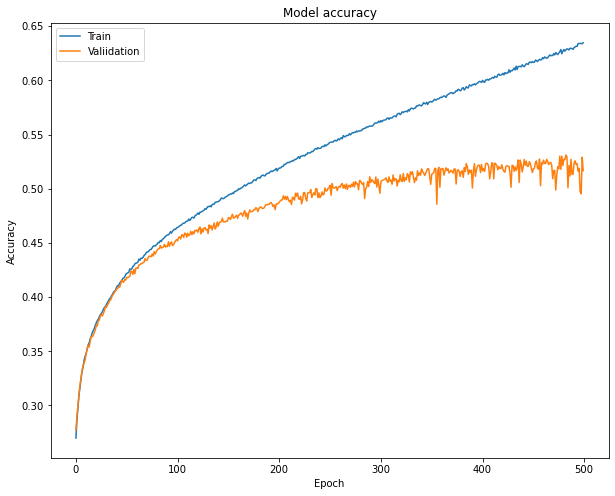

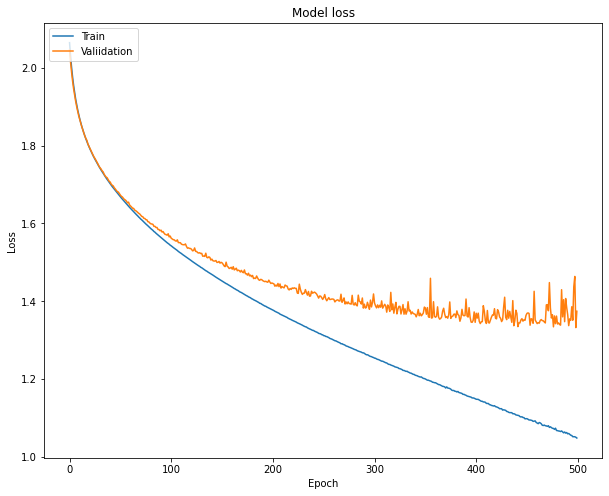

In [44]:
Visualize(history_1)

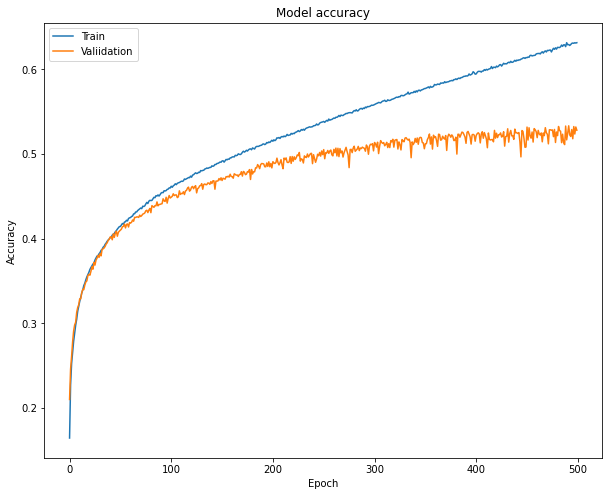

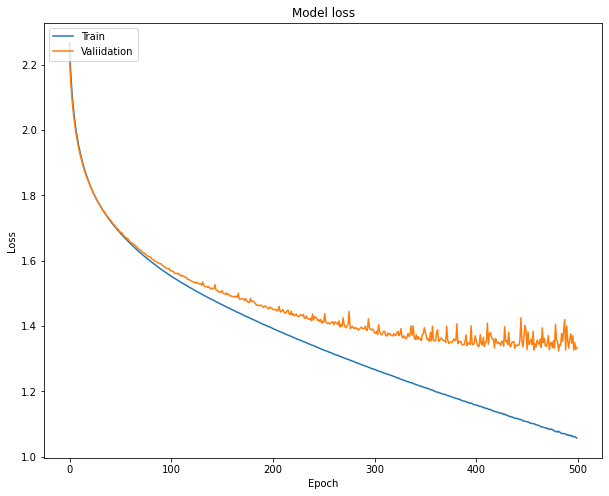

In [45]:
Visualize(history_2)